In [22]:
data = X_train["features"][:]

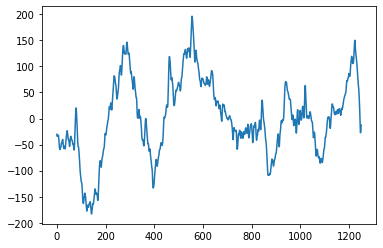

In [24]:
j = 24
plt.plot([i for i in range(1250)], data[j, 11:])
plt.show()

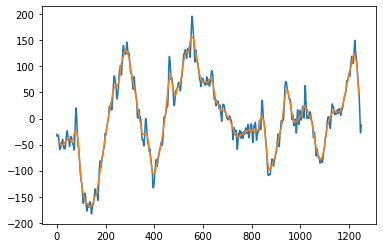

In [28]:
import numpy as np
####Fonction de lissage
def lissage(Lx,Ly,p):
    '''Fonction qui débruite une courbe par une moyenne glissante
    sur 2P+1 points'''
    Lxout=[]
    Lyout=[]
    Lxout = Lx[p: -p]
    for index in range(p, len(Ly)-p):
        average = np.mean(Ly[index-p : index+p+1])
        Lyout.append(average)
    return Lxout,Lyout
plt.plot([i for i in range(1250)], data[j, 11:])
x, y = lissage([i for i in range(1250)], data[j, 11:], 10)
plt.plot(x, y)

In [20]:
# init
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import h5py
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train = h5py.File("X_train.h5", "r")
y_train = pd.read_csv("y_train.csv")

In [12]:
# Features
def extract_features(h5):
    data = h5["features"][:]
    features = []
    features.append(data[:, :11])
    features.append(data[:, 11:].max(1).reshape(-1, 1))
    features.append(data[:, 11:].min(1).reshape(-1, 1))
    features.append(np.abs(data[:, 11:]).mean(1).reshape(-1, 1))
    features = np.concatenate(features, 1)
    return features


In [13]:
# Train
features_train = extract_features(X_train)
#clf = RandomForestClassifier(n_estimators=1,max_depth=1)

In [14]:
# Données
X_train,X_test,y_train,y_test=train_test_split(features_train,y_train["label"])
#clf.fit(X_train, y_train)

In [17]:
from sklearn.model_selection import cross_val_score
import lightgbm as lgb
from sklearn.model_selection import train_test_split
#clf = RandomForestClassifier(n_estimators=100,n_jobs=2,max_features="sqrt",max_depth=4,min_samples_split=None,verbose=1)
#clf = RandomForestClassifier(n_estimators=10,verbose=1,n_jobs=-1)
clf = lgb.LGBMClassifier(n_estimators=100,num_leaves=3,learning_rate=0.1,random_state=42,verbose=1)
#scores=cross_val_score(clf, features_train, y_train, cv=3)

clf.fit(X_train, y_train)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=3, objective=None,
               random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0,
               verbose=1)

In [18]:
y_pred=clf.predict(X_test)
import numpy as np
print((np.array(y_test)))
matches=[int(y_pred[k]==np.array(y_test)[k]) for k in range(len(y_pred))]
print(np.sum(matches)/len(y_pred))

[1 1 1 ... 2 0 2]
0.5079117552630372


In [9]:
# test
X_test = h5py.File("X_test.h5", "r")
features_test = extract_features(X_test)
y_pred = clf.predict(features_test)
with open("y_benchmark.csv", "w") as f:
    f.write("".join(["id,label\n"] + ["{},{}\n".format(i, y) for i, y in enumerate(y_pred)]))